# Etapas

 - Modelar o problema -> definir a equação
 - Definir o Método: Runge Kutta - 4ª Ordem 

$\frac{d^2 y}{dt^2} + \frac{b}{m}\left( \frac{dy}{dt} \right)^2 + \frac{dm}{dt} \frac{v_{ex}}{m} + g = 0$

In [5]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

In [15]:
# Parâmetros Constantes

b = 1.0 #Fator de Amortecimento
v_ex = 100.0 #Velocidade de Exaustão (m/s)
g = -9.81 #Aceleração da Gravi0dade (m/s^2)
dm_dt = -0.1 #Taxa de Queima de Combustível (kg/s)

In [7]:
# Condições Iniciais

y0 = 0.0  # Altura Inicial
v0 = 0.0  # Velocidade Inicial
m0 = 10.0 # Massa total do foguete
t0 = 0.0  # Instante Inicial
tf = 10.0  # Instante Final (Instante em que o combustível para de queimar)

$\frac{d v}{dt} + \frac{b}{m}( v)^2 + \frac{dm}{dt} \frac{v_{ex}}{m} + g = 0$

In [8]:
#Definindo o Sistema de Equações
def SistemaEDO(t, Y):
    y, v, m = Y
    dydt = v
    dvdt = -g - (b/m)*v**2 - dm_dt*(v_ex/m)
    dmdt = dm_dt
    
    return [dydt, dvdt, dmdt]

In [9]:
#Inserindo as Condições Iniciais

Y0 = [y0, v0, m0]

In [16]:
#Resolver a EDO utilizando solve_ivp

solution = solve_ivp(SistemaEDO, [t0, tf], Y0, t_eval=np.arange(t0, tf, 1e-6))

In [27]:
#Verificação do processo de integração
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-06 ...  1.000e+01  1.000e+01]
        y: [[ 0.000e+00  5.405e-12 ...  9.489e+01  9.489e+01]
            [ 0.000e+00  1.081e-05 ...  9.934e+00  9.934e+00]
            [ 1.000e+01  1.000e+01 ...  9.000e+00  9.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 98
     njev: 0
      nlu: 0

In [18]:
t_values = solution.t
y_values = solution.y[0]
v_values = solution.y[1]
m_values = solution.y[2]

<function matplotlib.pyplot.show(close=None, block=None)>

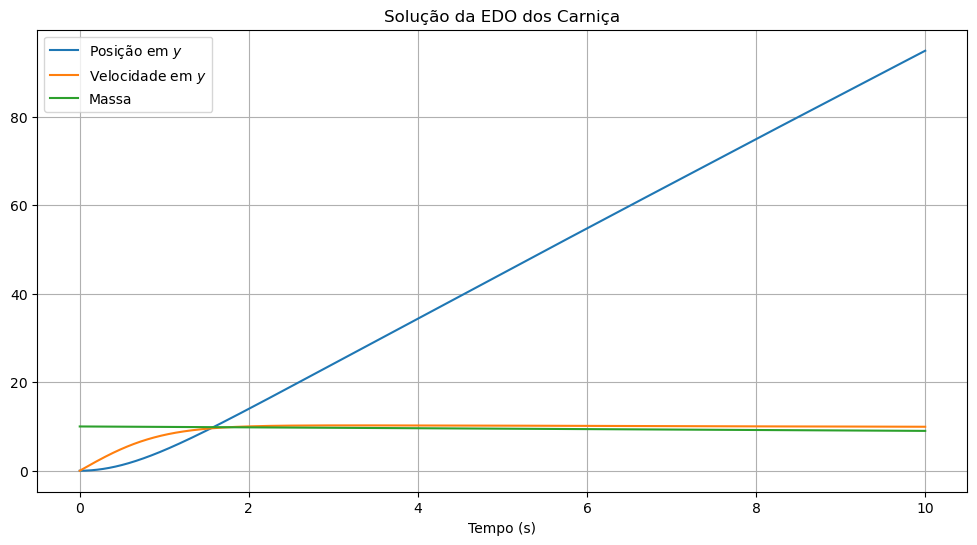

In [20]:
#Plotting dos Resultados

plt.figure(figsize=(12, 6))
plt.plot(t_values, y_values, label=r"Posição em $y$")
plt.plot(t_values, v_values, label=r'Velocidade em $y$')
plt.plot(t_values, m_values, label=r'Massa')

plt.xlabel('Tempo (s)')
#plt.ylabel()
plt.legend()
plt.title('Solução da EDO dos Carniça')

plt.grid(True)
plt.show